**Instalando dependências**

In [1]:
!pip install sklearn
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=0edd8a31532c1b91aae1169af2cf562a6cff8d3c84508a3da4c2913fead8b090
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


**Importando dependências**

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import pandas as pd
import hashlib
import datetime

# **Variáveis do Problema**


**Variáveis de Entrada**

1- Idade da empresa em meses

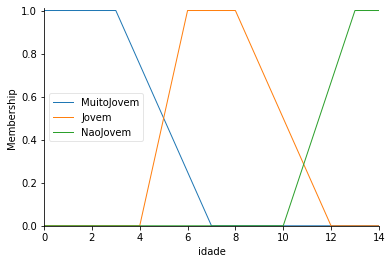

In [3]:
idade = ctrl.Antecedent(np.arange(0, 15, 1), 'idade')
idade['MuitoJovem'] = fuzz.trapmf(idade.universe, [0, 0, 3, 7])
idade['Jovem'] = fuzz.trapmf(idade.universe, [4, 6, 8, 12])
idade['NaoJovem'] = fuzz.trapmf(idade.universe, [10, 13, 15, 150])

idade.view()

2- Fator Saída x Entrada: valores de emissão de notas fiscais de saída em relação às de entrada por mês

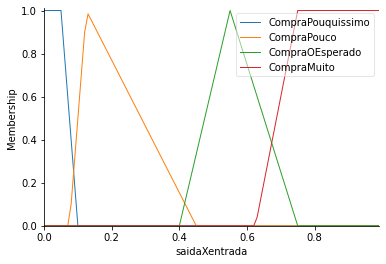

In [4]:
saidaXentrada = ctrl.Antecedent(np.arange(0, 1, 0.01), 'saidaXentrada')
saidaXentrada['CompraPouquissimo'] = fuzz.trapmf(saidaXentrada.universe, [0.0, 0.0, 0.05, 0.10])
saidaXentrada['CompraPouco'] = fuzz.trimf(saidaXentrada.universe, [0.075, 0.125, 0.45])
saidaXentrada['CompraOEsperado'] = fuzz.trimf(saidaXentrada.universe, [0.40, 0.55, 0.75])
saidaXentrada['CompraMuito'] = fuzz.trapmf(saidaXentrada.universe, [0.625, 0.75, 1, 10])

saidaXentrada.view()

3- Fator Saída X Arrecadação: valores de emissão de notas fiscais e arrecadação declarada

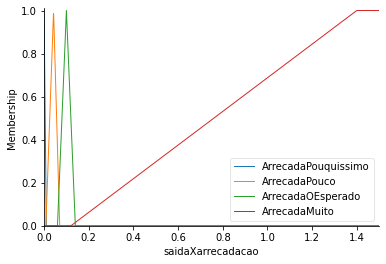

In [5]:
saidaXarrecadacao = ctrl.Antecedent(np.arange(0, 1.50, 0.001), 'saidaXarrecadacao')
saidaXarrecadacao['ArrecadaPouquissimo'] = fuzz.trimf(saidaXarrecadacao.universe, [0, 0.0, 0.01])
saidaXarrecadacao['ArrecadaPouco'] = fuzz.trimf(saidaXarrecadacao.universe, [0.008, 0.0425, 0.070])
saidaXarrecadacao['ArrecadaOEsperado'] = fuzz.trimf(saidaXarrecadacao.universe, [0.060, 0.100, 0.140])
saidaXarrecadacao['ArrecadaMuito'] = fuzz.trapmf(saidaXarrecadacao.universe, [0.120, 1.40, 1.50, 14])

saidaXarrecadacao.view()

# **Variáveis de Saída**

Grau de Fraudadora

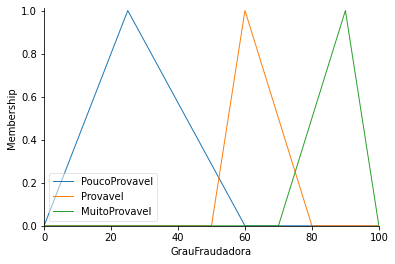

In [6]:
noteira = ctrl.Consequent(np.arange(0, 101, 1), 'GrauFraudadora')
noteira['PoucoProvavel'] = fuzz.trimf(noteira.universe, [0, 25, 60])
noteira['Provavel'] = fuzz.trimf(noteira.universe, [50, 60, 80])
noteira['MuitoProvavel'] = fuzz.trimf(noteira.universe, [70, 90, 100])
noteira.view()

# **Regras**

In [7]:
rules = []

Muito Jovem

In [8]:
rules.append(
    ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaPouquissimo'],
              noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['MuitoProvavel']))
rules.append(
    ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaOEsperado'],
              noteira['Provavel']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['PoucoProvavel']))

rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Provavel']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['PoucoProvavel']))

rules.append(
    ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaPouquissimo'],
              noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Provavel']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['PoucoProvavel']))

rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Provavel']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['PoucoProvavel']))



Jovem

In [9]:
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Provavel']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['PoucoProvavel']))

rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Provavel']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['PoucoProvavel']))

rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Provavel']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['PoucoProvavel']))

rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Provavel']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['PoucoProvavel']))


Não Jovem

In [10]:
rules.append(
    ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaPouquissimo'],
              noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Provavel']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['PoucoProvavel']))

rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Provavel']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['PoucoProvavel']))

rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Provavel']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['PoucoProvavel']))

rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['MuitoProvavel']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Provavel']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['PoucoProvavel']))


Controlador Fuzzy

In [11]:
noteira_ctrl = ctrl.ControlSystem(rules)
noteira_sim = ctrl.ControlSystemSimulation(noteira_ctrl)


Carregando a massa de dados

In [12]:
url = 'https://github.com/rribas/artigo_fuzzy_icms/raw/main/empresas_suspeitas_hashid.csv'
df_suspeitas = pd.read_csv(url, sep=';', encoding='utf-8', quotechar='"', decimal=',')
df_suspeitas = df_suspeitas.dropna()

In [13]:
df_suspeitas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21333 entries, 0 to 21332
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                21333 non-null  object 
 1   TOTAL_NF_ENTRADA  21333 non-null  float64
 2   IDADE             21333 non-null  float64
 3   SXE               21333 non-null  float64
 4   SXA               21333 non-null  float64
 5   FUZZYNUMBER       21333 non-null  float64
 6   FUZZYLABEL        21333 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


In [148]:
df_suspeitas.head()

,ID,IDADE,SXE,SXA
0,49cb28e2a74311276f86663c464fbd7d57c21a2a8fa81a...,5.53,0.035,0.001
1,112e7f901ea12f5bfd6951d0d8729d7bde42062cf625ea...,181.28,0.028,0.177
2,8bf4d35a18f05acaefd3e37fca78def36eaa7515d12b64...,189.34,0.337,0.000
3,69acefe78ce65f791fa4e03dca35f76d1f83f0108813f0...,41.50,0.247,0.000
4,26f1b4bc3ee7dc709ff9c30be188eb2c4fdd28969fa67f...,8.82,0.018,0.035


Exemplo de teste com valores arbitrários

74.82684602474669
Pertinência a PoucoProvavel: 0.0
Pertinência a Provavel: 0.2586576987626657
Pertinência a MuitoProvavel: 0.2413423012373343
Classificação final: Provável; Pertinência: 0.2586576987626657


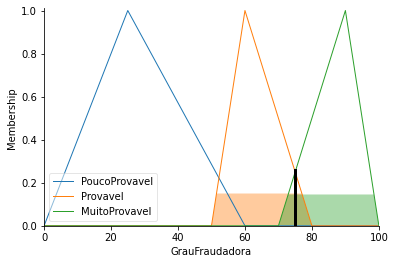

In [149]:
noteira_sim.input['idade'] = 157.34
noteira_sim.input['saidaXentrada'] = 0.157
noteira_sim.input['saidaXarrecadacao'] = 0.066
noteira_sim.compute()
crisp_value = noteira_sim.output['GrauFraudadora']
print(crisp_value)
print('Pertinência a PoucoProvavel: ' + str(fuzz.interp_membership(noteira.universe, noteira['PoucoProvavel'].mf, crisp_value)))
print('Pertinência a Provavel: ' + str(fuzz.interp_membership(noteira.universe, noteira['Provavel'].mf, crisp_value)))
print('Pertinência a MuitoProvavel: ' + str(fuzz.interp_membership(noteira.universe, noteira['MuitoProvavel'].mf, crisp_value)))

ling_value_pouco = fuzz.interp_membership(noteira.universe, noteira['PoucoProvavel'].mf, crisp_value)
ling_value_provavel = fuzz.interp_membership(noteira.universe, noteira['Provavel'].mf, crisp_value)
ling_value_muito = fuzz.interp_membership(noteira.universe, noteira['MuitoProvavel'].mf, crisp_value)

# Aqui assumimos o maior valor da maior variável possível
# Ex: se todos ou os dois maiores valores foram iguais, isto é, tiverem a mesma pertinência em mais de um grupo, o sistema não tem como decidir, então assumimos o de maior importância

if ling_value_pouco > 0:
    ling_value = ling_value_pouco
    ling_label = 'Pouco Provável'
if (ling_value_provavel > 0 and ling_value_provavel >= ling_value_pouco):
    ling_value = ling_value_provavel
    ling_label = 'Provável'
if (ling_value_muito > 0 and ling_value_muito >= ling_value_provavel):
    ling_value = ling_value_muito
    ling_label = 'Muito Provável'

print(f'Classificação final: {ling_label}; Pertinência: {ling_value}')
noteira.view(sim=noteira_sim)


Submissão de todos os dados ao sistema Fuzzy

As seguintes colunas serão adicionas neste processo:


*   CRISP_VALUE
    
    - é o valor 'crisp' de saída do sistema

*   RESULT_MS_POUCO
    
    - é o grau de pertinência ao conjunto "PoucoProvavel"

*   RESULT_MS_PROVAVEL
    
    - é o grau de pertinência ao conjunto "Provavel"

*   RESULT_MS_MUITO
    
    - é o grau de pertinência ao conjunto "MuitoProvavel"

*   FINAL_MS_VALUE
    
    - é o maior valor "crisp" dos graus de pertinência encontrados

*   FINAL_MS_LABEL
    
    - é a variável linguística do resultado da defuzzyficação





In [150]:
for i in df_suspeitas.index:
  noteira_sim.input['idade'] = float(df_suspeitas.at[i, 'IDADE'])
  noteira_sim.input['saidaXentrada'] = float(df_suspeitas.at[i, 'SXE'])
  noteira_sim.input['saidaXarrecadacao'] = float(df_suspeitas.at[i, 'SXA'])
  noteira_sim.compute()
  crisp_value = noteira_sim.output['GrauFraudadora']
  
  ling_value = 0
  ling_label = ""
  
  ling_value_pouco = fuzz.interp_membership(noteira.universe, noteira['PoucoProvavel'].mf, crisp_value)
  ling_value_provavel = fuzz.interp_membership(noteira.universe, noteira['Provavel'].mf, crisp_value)
  ling_value_muito = fuzz.interp_membership(noteira.universe, noteira['MuitoProvavel'].mf, crisp_value)

  # Aqui assumimos o maior valor da maior variável possível
  # Ex: se todos ou os dois maiores valores foram iguais, isto é, tiverem a mesma pertinência em mais de um grupo, o sistema não tem como decidir, então assumimos o de maior importância

  if ling_value_pouco > 0:
      ling_value = ling_value_pouco
      ling_label = 'Pouco Provável'
  if (ling_value_provavel > 0 and ling_value_provavel >= ling_value_pouco):
      ling_value = ling_value_provavel
      ling_label = 'Provável'
  if (ling_value_muito > 0 and ling_value_muito >= ling_value_provavel):
      ling_value = ling_value_muito
      ling_label = 'Muito Provável'
  
  # CRIP_VALUE é o valor de saída do sistema
  df_suspeitas.at[i,'CRISP_VALUE'] = ling_value
  
  # RESULT_MS_POUCO é o grau de pertinência ao conjunto "PoucoProvavel"
  df_suspeitas.at[i,'RESULT_MS_POUCO'] = ling_value_pouco

  # RESULT_MS_PROVAVEL é o grau de pertinência ao conjunto "Provavel"
  df_suspeitas.at[i,'RESULT_MS_PROVAVEL'] = ling_value_provavel

  # RESULT_MS_MUITO é o grau de pertinência ao conjunto "MuitoProvavel"
  df_suspeitas.at[i,'RESULT_MS_MUITO'] = ling_value_muito

  # FINAL_MS_VALUE é o maior grau de pertinência encontrado 
  df_suspeitas.at[i,'FINAL_MS_VALUE'] = ling_value

  # FINAL_MS_LABEL é a variável linguística do resultado da defuzzyficação 
  df_suspeitas.at[i,'FINAL_MS_LABEL'] = ling_label
  

In [151]:
df_suspeitas.tail()

,ID,IDADE,SXE,SXA,CRISP_VALUE,RESULT_MS_POUCO,RESULT_MS_PROVAVEL,RESULT_MS_MUITO,FINAL_MS_VALUE,FINAL_MS_LABEL
21328,78d0d333a4079e3df5cc9ac312377ae435aab5204845e0...,241.57,0.936,0.003,0.821795,0.0,0.00000,0.821795,0.821795,Muito Provável
21329,c7badf0f1553cf9f69ff9e1b138c520588aff3564b6def...,72.08,0.001,0.010,0.757174,0.0,0.00000,0.757174,0.757174,Muito Provável
21330,3227a07fa4e85a11fd37057d8c44308beb733217828be4...,81.76,0.008,0.114,0.818210,0.0,0.81821,0.000000,0.818210,Provável
21331,0a50bb4d66e612461a5f57db93dc32fee87c5d34c7feea...,3.15,0.000,0.000,0.833107,0.0,0.00000,0.833107,0.833107,Muito Provável
21332,5f44822782ab01a70d8abe0a228cc31fcbf0b6e6e92b08...,23.98,0.577,0.008,0.774074,0.0,0.00000,0.774074,0.774074,Muito Provável


In [152]:
fuzzy_results = df_suspeitas['FINAL_MS_LABEL'].value_counts()
print(fuzzy_results)


Muito Provável    17858
Provável           2070
Pouco Provável     1405
Name: FINAL_MS_LABEL, dtype: int64


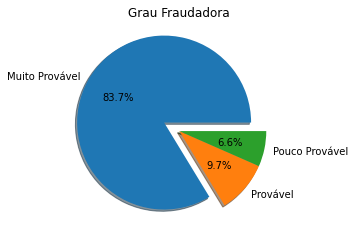

In [153]:
lbs = ['Muito Provável','Provável','Pouco Provável']
exp = [0.2, 0, 0]

plt.title("Grau Fraudadora")
fg = plt.pie(fuzzy_results, labels=lbs, explode=exp, autopct='%2.1f%%', shadow=True)

Conferir com a lista de empresas já investigadas e confirmadas como fraudadoras

In [154]:
url = 'https://github.com/rribas/artigo_fuzzy_icms/raw/main/empresas_confirmadas_hashid.csv'
df_confirmadas = pd.read_csv(url, sep=';', encoding='utf-8', quotechar='"', decimal=',')

In [155]:
empresas_suspeitas_confirmadas = df_suspeitas[df_suspeitas['ID'].isin(df_confirmadas['ID'].values) & df_suspeitas['FINAL_MS_LABEL'].isin(['Provável', 'Muito Provável'])]
empresas_suspeitas_confirmadas['FINAL_MS_LABEL'].value_counts()


Muito Provável    145
Name: FINAL_MS_LABEL, dtype: int64

145 empresas classificadas como 'Muito Provável' estão na listas de fraudadoras confirmadas

Nenhuma empresas classificada como 'Provável' está na listas de fraudadoras confirmadas

---



In [156]:
empresas_nao_suspeitas_confirmadas = df_suspeitas[df_suspeitas['ID'].isin(df_confirmadas['ID'].values) & df_suspeitas['FINAL_MS_LABEL'].isin(['Pouco Provável'])]
empresas_nao_suspeitas_confirmadas['FINAL_MS_LABEL'].value_counts()


Series([], Name: FINAL_MS_LABEL, dtype: int64)

Nenhuma empresa classificada como 'Pouco Provável' estava na lista de empresas fraudadoras

Isto confirma que o sistema Fuzzy está robusto e não classificou erroneamente nenhuma das empresas.

---



In [157]:
empresas_suspeitas = df_suspeitas[~df_suspeitas['ID'].isin(df_confirmadas['ID'].values) & 
                                  df_suspeitas['FINAL_MS_LABEL'].isin(['Provável', 'Muito Provável']) &
                                  ~df_suspeitas['FINAL_MS_LABEL'].isin(['Pouco Provável'])]
empresas_suspeitas['FINAL_MS_LABEL'].value_counts()


Muito Provável    17713
Provável           2070
Name: FINAL_MS_LABEL, dtype: int64

Das empresas avaliadas como 'Provável' e 'Muito Provável' quais ainda não foram confirmadas como fraudadoras e devem ser investigadas. 

17.713 empresas classificadas como 'Muito Provável' são suspeitas e precisam ser investigadas com 'alta prioridade'.

2.070 empresas classificadas como 'Provável' são suspeitas e precisam ser investigadas com 'média prioridade'.

---



In [158]:
empresas_suspeitas[empresas_suspeitas['FINAL_MS_LABEL'] == 'Muito Provável']

,ID,IDADE,SXE,SXA,CRISP_VALUE,RESULT_MS_POUCO,RESULT_MS_PROVAVEL,RESULT_MS_MUITO,FINAL_MS_VALUE,FINAL_MS_LABEL
0,49cb28e2a74311276f86663c464fbd7d57c21a2a8fa81a...,5.53,0.035,0.001,0.825881,0.0,0.0,0.825881,0.825881,Muito Provável
2,8bf4d35a18f05acaefd3e37fca78def36eaa7515d12b64...,189.34,0.337,0.000,0.790413,0.0,0.0,0.790413,0.790413,Muito Provável
3,69acefe78ce65f791fa4e03dca35f76d1f83f0108813f0...,41.50,0.247,0.000,0.816258,0.0,0.0,0.816258,0.816258,Muito Provável
4,26f1b4bc3ee7dc709ff9c30be188eb2c4fdd28969fa67f...,8.82,0.018,0.035,0.826863,0.0,0.0,0.826863,0.826863,Muito Provável
5,771eaf181989369711032b2a7b7b4a75a04e61a97e4e26...,45.37,0.826,0.003,0.821795,0.0,0.0,0.821795,0.821795,Muito Provável
...,...,...,...,...,...,...,...,...,...,...
21327,40a8da4c74bd190f39149b0f745ae3df586c3d981e9a01...,29.00,0.696,0.000,0.811613,0.0,0.0,0.811613,0.811613,Muito Provável
21328,78d0d333a4079e3df5cc9ac312377ae435aab5204845e0...,241.57,0.936,0.003,0.821795,0.0,0.0,0.821795,0.821795,Muito Provável
21329,c7badf0f1553cf9f69ff9e1b138c520588aff3564b6def...,72.08,0.001,0.010,0.757174,0.0,0.0,0.757174,0.757174,Muito Provável
21331,0a50bb4d66e612461a5f57db93dc32fee87c5d34c7feea...,3.15,0.000,0.000,0.833107,0.0,0.0,0.833107,0.833107,Muito Provável


In [160]:
empresas_suspeitas[empresas_suspeitas['FINAL_MS_LABEL'] == 'Provável']

,ID,IDADE,SXE,SXA,CRISP_VALUE,RESULT_MS_POUCO,RESULT_MS_PROVAVEL,RESULT_MS_MUITO,FINAL_MS_VALUE,FINAL_MS_LABEL
13,0ad04510afe5524cb791a929def65c5573e5e9f5ccabb6...,139.82,0.290,0.086,0.804840,0.0,0.804840,0.0,0.804840,Provável
20,a2dc8f90140b1589b730bfe29673e39ecf5e6e2f44fbca...,210.60,0.048,0.092,0.827778,0.0,0.827778,0.0,0.827778,Provável
21,3cf11ca971c7da0a6e7acc41e68872e03b7ff6b5b04385...,72.79,0.068,0.081,0.807839,0.0,0.807839,0.0,0.807839,Provável
22,b6b2e14b4b09056a0018578f00bb60e96b5204b80f3eb7...,192.57,0.011,0.069,0.638620,0.0,0.638620,0.0,0.638620,Provável
27,9957fe8b691a888fa1f4e51617f755632821e5e6087143...,143.18,0.076,0.072,0.785294,0.0,0.785294,0.0,0.785294,Provável
...,...,...,...,...,...,...,...,...,...,...
21284,43481d7bba90c1c9a145708709685b1fd40686bfd51f77...,86.53,0.141,0.119,0.807839,0.0,0.807839,0.0,0.807839,Provável
21296,16526660ed5a20a0dd5d7bf2672b4e4c344667c207bab5...,228.00,0.079,0.071,0.782548,0.0,0.782548,0.0,0.782548,Provável
21304,6b1a7bd40565f676bfdf69980de54bfcfd83d1552bf6eb...,29.92,0.001,0.102,0.832937,0.0,0.832937,0.0,0.832937,Provável
21314,726e314cc966b6d20dc529e2ee7f82d3c7cc47a55af5a4...,86.79,0.521,0.110,0.825000,0.0,0.825000,0.0,0.825000,Provável


In [161]:
empresas_suspeitas[empresas_suspeitas['FINAL_MS_LABEL'] == 'Pouco Provável']

,ID,IDADE,SXE,SXA,CRISP_VALUE,RESULT_MS_POUCO,RESULT_MS_PROVAVEL,RESULT_MS_MUITO,FINAL_MS_VALUE,FINAL_MS_LABEL
